<a href="https://colab.research.google.com/github/charurathour/Data-science-projects/blob/main/Nvidia_share_price_prediction_with_Monte_carlo_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from scipy.stats import norm

In [49]:
df=yf.download('NVDA')

[*********************100%***********************]  1 of 1 completed


In [50]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
1999-01-22,0.037615,0.044779,0.035585,0.040122,2714688000
1999-01-25,0.041556,0.042033,0.037615,0.040600,510480000
1999-01-26,0.038331,0.042869,0.037734,0.042033,343200000
1999-01-27,0.038212,0.039406,0.036301,0.038451,244368000
1999-01-28,0.038092,0.038451,0.037854,0.038212,227520000


In [51]:
df['Return']=df['Close'].pct_change()

In [52]:
df.head()

Price,Close,High,Low,Open,Volume,Return
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,
1999-01-22,0.037615,0.044779,0.035585,0.040122,2714688000,NaN
1999-01-25,0.041556,0.042033,0.037615,0.040600,510480000,0.104764
1999-01-26,0.038331,0.042869,0.037734,0.042033,343200000,-0.077594
1999-01-27,0.038212,0.039406,0.036301,0.038451,244368000,-0.003110
1999-01-28,0.038092,0.038451,0.037854,0.038212,227520000,-0.003144


In [53]:
num_simulations=10000
num_days= 22
last_price = df['Close'].iloc[-1]
simulation_df=np.zeros((num_days,num_simulations))

In [54]:
mu=df['Return'].mean()
sigma=df['Return'].std()

In [56]:
for simulation in range(num_simulations):
    price_list=[last_price]
    for day in range(num_days):
        price=price_list[-1]*np.exp((mu - 0.5 * sigma**2)+sigma * np.random.normal())
        price_list.append(price)
    simulation_df[:, simulation]=np.array(price_list[1:]).reshape(num_days)


final_prices=simulation_df[-1,:]
median_final_price=np.median(final_prices)

most_likely_simulation_index=np.argmin(np.abs(final_prices-median_final_price))
most_likely_simulation=simulation_df[:,most_likely_simulation_index]

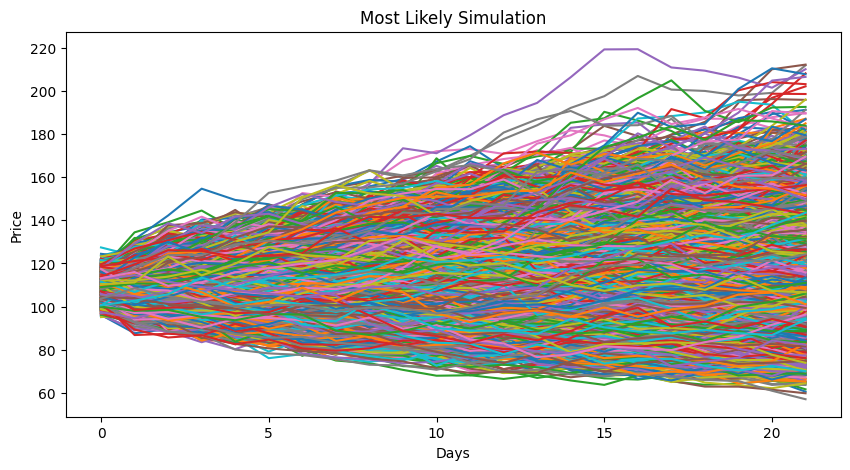

In [57]:
plt.figure(figsize=(10,5))
plt.plot(simulation_df)
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Most Likely Simulation')
plt.show()

In [59]:
print(f"the most likely simulation price is {most_likely_simulation[-1]}")

the most likely simulation price is 111.83358456956667


In [60]:
df.tail()

Price,Close,High,Low,Open,Volume,Return
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,
2025-03-05,117.300003,118.279999,114.510002,117.580002,284337900,0.011294
2025-03-06,110.570000,115.349998,110.220001,113.529999,321181900,-0.057374
2025-03-07,112.690002,113.480003,107.559998,111.250000,341755500,0.019173
2025-03-10,106.980003,111.849998,105.459999,109.900002,366487400,-0.050670
2025-03-11,108.760002,112.239998,104.769997,106.989998,353708300,0.016639
